In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"] = 'FFFFFF'
plt.rcParams["axes.facecolor"] = 'FFFFFF'
plt.rcParams["savefig.facecolor"] = 'FFFFFF'

In [3]:
dataset = pd.read_csv("EcommerceCustomers.csv")

In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Dataset Information

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Email                         500 non-null    object 
 1   Address                       500 non-null    object 
 2   Avatar                        500 non-null    object 
 3   Avg. Session Length           500 non-null    float64
 4   Time on App                   500 non-null    float64
 5   Time on Website               500 non-null    float64
 6   Length of Membership          500 non-null    float64
 7   Yearly Amount Spent           500 non-null    float64
 8   Spending Rounded              500 non-null    float64
 9   primarily used email service  500 non-null    object 
dtypes: float64(6), object(4)
memory usage: 39.2+ KB


#### Show Variables Info of Dataset

In [5]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Top 10 Customers Who Spent The Most Yearly Amount Spent

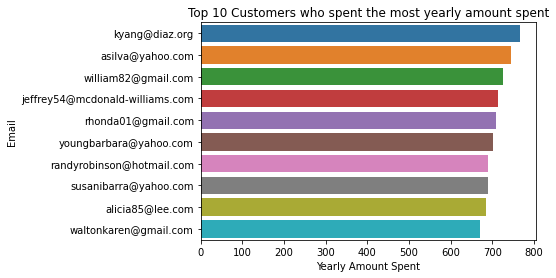

In [6]:
TopCustomer = dataset[['Email', 'Yearly Amount Spent']].set_index('Yearly Amount Spent')\
    .sort_values('Yearly Amount Spent',ascending=False).head(10)
plot = sns.barplot(x=TopCustomer.index, y=TopCustomer['Email'])
plot.set_title('Top 10 Customers who spent the most yearly amount spent');

#### Linear Relationship Between Variables

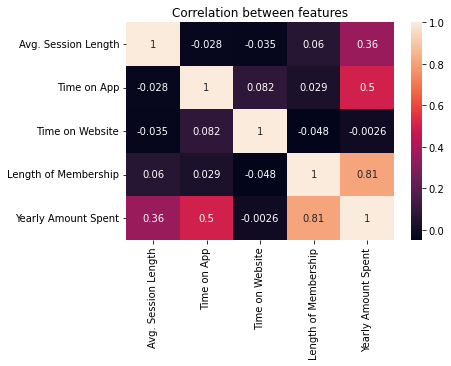

In [7]:
plot = sns.heatmap(dataset.corr(), annot=True)
plot.set_title('Correlation between features');

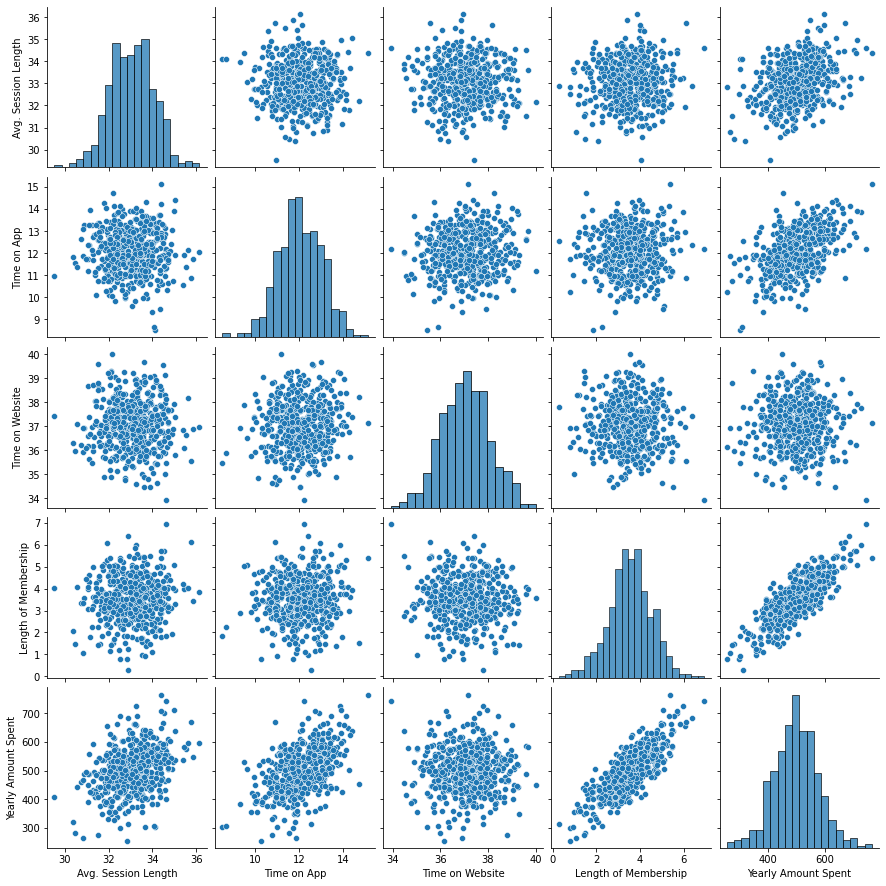

In [8]:
sns.pairplot(dataset);

#### Customer Yearly Spending Histogram

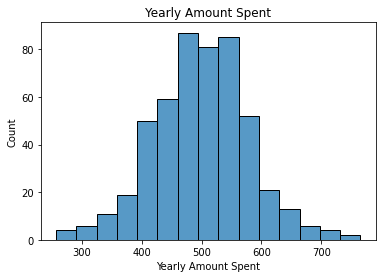

In [9]:
plot = sns.histplot(dataset['Yearly Amount Spent'], bins=15);
plot.set_title('Yearly Amount Spent');

#### Categorize User in Spending

In [10]:
dataset['Spending Rounded'] =  np.floor(dataset['Yearly Amount Spent'] / 100 ) * 100
spendingRounded = dataset.groupby('Spending Rounded').median()

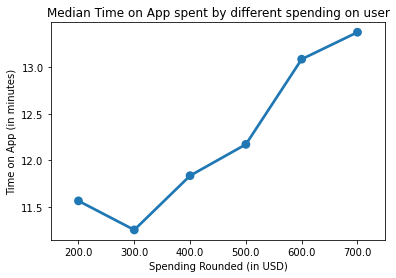

In [11]:
plot = sns.pointplot(x=spendingRounded.index, y=spendingRounded['Time on App'])
plot.set_title('Median Time on App spent by different spending on user')
plot.set_xlabel('Spending Rounded (in USD)')
plot.set_ylabel('Time on App (in minutes)');

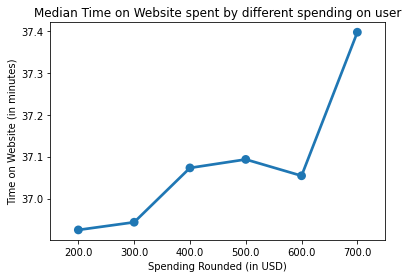

In [12]:
plot = sns.pointplot(x=spendingRounded.index, y=spendingRounded['Time on Website'])
plot.set_title('Median Time on Website spent by different spending on user')
plot.set_xlabel('Spending Rounded (in USD)')
plot.set_ylabel('Time on Website (in minutes)');

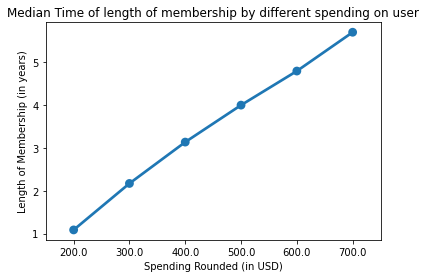

In [13]:
plot = sns.pointplot(x=spendingRounded.index, y=spendingRounded['Length of Membership'])
plot.set_title('Median Time of length of membership by different spending on user')
plot.set_xlabel('Spending Rounded (in USD)')
plot.set_ylabel('Length of Membership (in years)');

#### Primary Used Email Service

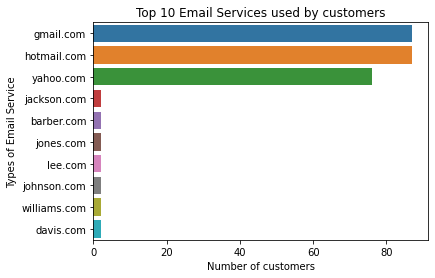

In [14]:
primaryUsedEmailService = dataset['Email'].str.split('@').str[1].value_counts().head(10)
plot = sns.barplot(x=primaryUsedEmailService, y=primaryUsedEmailService.index)
plot.set_title('Top 10 Email Services used by customers')
plot.set_xlabel('Number of customers')
plot.set_ylabel('Types of Email Service');

#### Does Customer Classified by Email Service Spend Differently?

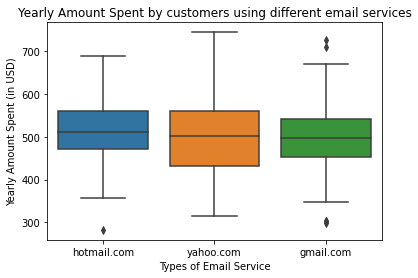

In [15]:
dataset['primarily used email service'] = dataset['Email'].str.split('@').str[1]
top3EmailServices = dataset.apply(lambda x: True if x['primarily used email service'] in ['gmail.com', 'hotmail.com', 'yahoo.com'] else False, axis=1)
top3EmailServices=dataset[top3EmailServices].dropna()
plot = sns.boxplot(x='primarily used email service', y='Yearly Amount Spent', data=top3EmailServices);
plot.set_title('Yearly Amount Spent by customers using different email services');
plot.set_xlabel('Types of Email Service');
plot.set_ylabel('Yearly Amount Spent (in USD)');

#### Preferred Avatar

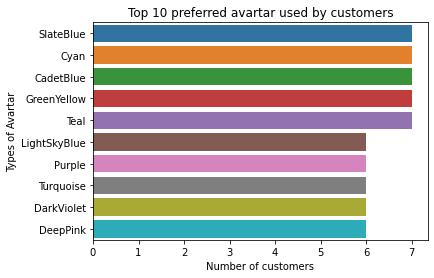

In [16]:
preferredAvartar = dataset['Avatar'].value_counts().head(10)
plot = sns.barplot(x=preferredAvartar, y=preferredAvartar.index)
plot.set_title('Top 10 preferred avartar used by customers')
plot.set_xlabel('Number of customers')
plot.set_ylabel('Types of Avartar');

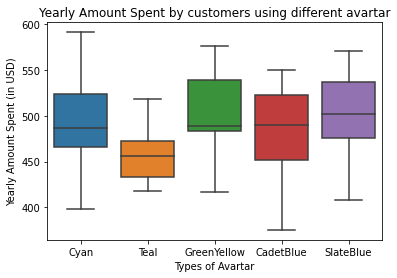

In [17]:
filterLessThan6Avatar = dataset['Avatar'].value_counts() > 6
filterLessThan6Avatar = filterLessThan6Avatar[filterLessThan6Avatar].index
avatarAffectsAmountSpent = dataset.apply(lambda x: True if x['Avatar'] in filterLessThan6Avatar else False, axis=1)
avatarAffectsAmountSpent = dataset[avatarAffectsAmountSpent]
plot = sns.boxplot(x='Avatar', y='Yearly Amount Spent', data=avatarAffectsAmountSpent)
plot.set_title('Yearly Amount Spent by customers using different avartar')
plot.set_xlabel('Types of Avartar')
plot.set_ylabel('Yearly Amount Spent (in USD)');